# Data PreProcessing

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Importing packagesimport pandas as pd
import pandas as pd
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
##Loading csv files
path = r'/content/drive/MyDrive/Data Base/Velocity parameter/S7_V.csv'

df= pd.read_csv(path, skiprows=1, usecols=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], names=['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Real_Displacement'])
print (df.info)
print(df.shape)

#Standarizing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler( feature_range = (0, 1) )
x = scaler.fit_transform(df)
x = pd.DataFrame(data = x, columns = ['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Real_Displacement'])

scaler = MinMaxScaler( feature_range = (0, 1) )
df = scaler.fit_transform(df)
df = pd.DataFrame(data = df, columns = ['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Real_Displacement'])

y = df['Real_Displacement']
y = pd.DataFrame(y)
print("y = \n",y)
print(y.shape)

print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape



-1 in df['Real_Displacement']

<bound method DataFrame.info of        Acc_x_knee  Acc_y_knee  Acc_z_knee  Gyro_x_knee  Gyro_y_knee  \
0            2.36       -9.07        3.08        -0.31        -1.00   
1            2.33       -9.09        2.99        -0.13        -1.94   
2            2.57       -8.98        2.89         1.06        -4.12   
3            2.70       -8.88        2.93         0.37        -3.81   
4            2.69       -8.93        3.03        -0.44        -3.37   
...           ...         ...         ...          ...          ...   
58172        3.47       -9.23        0.74        13.88        35.69   
58173        3.65       -9.46        0.56        15.44        39.00   
58174        3.98       -9.46        0.31        18.00        41.63   
58175        4.39       -9.37        0.19        19.94        43.88   
58176        5.19       -8.96       -0.04        22.31        50.75   

       Gyro_z_knee  Magne_x_knee  Magne_y_knee  Magne_z_knee  Euler_x_knee  \
0            -3.69        -21.56     

False

## Create train and test subdatasets

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(46541, 25) (11636, 25)
(46541, 1) (11636, 1)


## Graphics

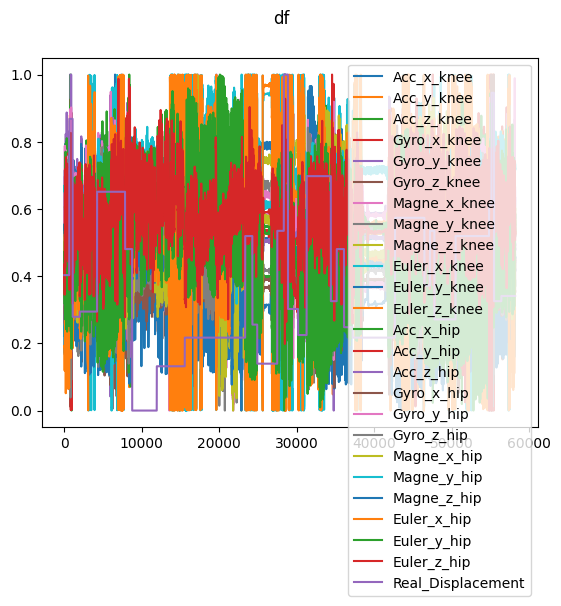

Loaded 58177 subjects


In [8]:
name = 'df'
columns_names = ['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Real_Displacement']
#plt.plot(df[name])
plt.plot(x)
plt.suptitle(name)
plt.legend(columns_names)
plt.show()

# plot the x, y, z acceleration and activities for multiple subjects
def plot_subject(subject):
	plt.figure()
	# create a plot for each column
	for col in range(subject.shape[0]):
		plt.subplot(subject.shape[0], 1, col+1)
		plt.plot(subject[:,col])
	plt.show()

# load
subjects = df
print('Loaded %d subjects' % len(subjects))


# Proccessing into windows

In [9]:
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
#df.loc[2:4]
#print(df.loc[2:4])

dataset_size = df.shape[0] ### how many rows
window_size =  100 ### how many time steps we want to process simultaneously

xx = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(xx[0:5]).loc
print("shape(xx) = ", xx.shape)

yy = np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print("shape(yy) = ", yy.shape)

#yy = np.array([ y.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(yy[0:5])
#print("shape(yy) = ", yy.shape)
#yy[2].shape
#yy.reshape(-1,2)

   Acc_x_knee  Acc_y_knee  Acc_z_knee  Gyro_x_knee  Gyro_y_knee  Gyro_z_knee  \
0    0.515794    0.536572    0.421685     0.529121     0.585638     0.362399   
1    0.515404    0.536216    0.420243     0.529395     0.584790     0.362759   
2    0.518523    0.538174    0.418642     0.531207     0.582824     0.362680   
3    0.520213    0.539954    0.419283     0.530156     0.583103     0.362263   
4    0.520083    0.539064    0.420884     0.528923     0.583500     0.361982   

   Magne_x_knee  Magne_y_knee  Magne_z_knee  Euler_x_knee  ...  Gyro_x_hip  \
0      0.375661      0.490132      0.611822      0.222787  ...    0.385616   
1      0.375661      0.490132      0.611822      0.222954  ...    0.388336   
2      0.369261      0.490132      0.606424      0.222954  ...    0.387977   
3      0.369261      0.490132      0.606424      0.222954  ...    0.388109   
4      0.369261      0.490132      0.606424      0.222954  ...    0.388581   

   Gyro_y_hip  Gyro_z_hip  Magne_x_hip  Magne_y_hi

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

-1 in yy

(46461, 100, 25) (11616, 100, 25)
(46461, 1) (11616, 1)


False

In [11]:
print(X_train.shape[1])
print(X_train.shape[2])
print(y_train.shape[1])
print(np.unique(y_train).shape[0])
print(X_train.shape[0])


100
25
1
25
46461


# **CNN-LSTM Archicture**

#### Load Tensorflow libraries

In [12]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, TimeDistributed
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
print(tf.version.VERSION)
print(tf.__version__)


2.13.0
2.13.0


46461
11616
1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, None, 8, 64)       4864      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, None, 6, 64)       12352     
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, None, 6, 64)       256       
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, None, 6, 64)       0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, None, 

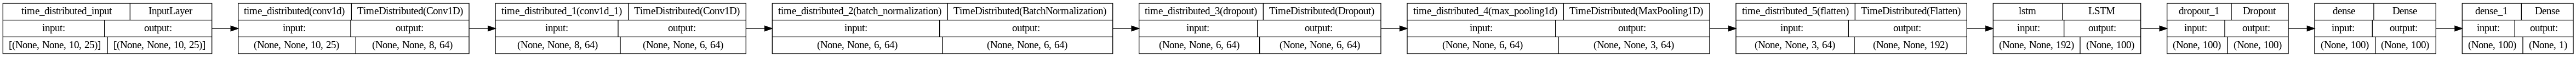

In [13]:
# Define model
verbose, epochs, batch_size = 1, 30, 128


n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], 1
# the Y train shape changed to one in order to have un valor continuo en la salida
#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], np.unique(y_train).shape[0]
#n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
#n_timesteps, n_features, n_outputs = 100, 6, 3

# reshape data into time steps of sub-sequences
n_steps, n_length = 10, 10
X_train= X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features))
print(X_train.shape[0])
print(X_test.shape[0])

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error', 'accuracy',])

print(n_outputs)

# Plotting model
plot = tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR')
print(model.summary())
plot

In [14]:
epochs, batch_size = 30, 128
# fit network
start_time = time.perf_counter()

result = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False, validation_data=(X_test, y_test))

# evaluate model
end_time = time.perf_counter()
run_time = (end_time - start_time)
print( "time = " + str(int(run_time)) + " s = " + str(int(run_time//60)) + " mins" )

Epoch 1/30
363/363 [==============================] - 21s 14ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - accuracy: 0.0633 - val_loss: 0.0198 - val_mean_squared_error: 0.0198 - val_accuracy: 0.0607
Epoch 2/30
363/363 [==============================] - 3s 8ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - accuracy: 0.0642 - val_loss: 0.0107 - val_mean_squared_error: 0.0107 - val_accuracy: 0.0618
Epoch 3/30
363/363 [==============================] - 3s 8ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - accuracy: 0.0642 - val_loss: 0.0065 - val_mean_squared_error: 0.0065 - val_accuracy: 0.0618
Epoch 4/30
363/363 [==============================] - 3s 9ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - accuracy: 0.0643 - val_loss: 0.0094 - val_mean_squared_error: 0.0094 - val_accuracy: 0.0618
Epoch 5/30
363/363 [==============================] - 4s 10ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - accuracy: 0.0643 - val_loss: 0.0041 - val_mean_squared_error: 0.0041 

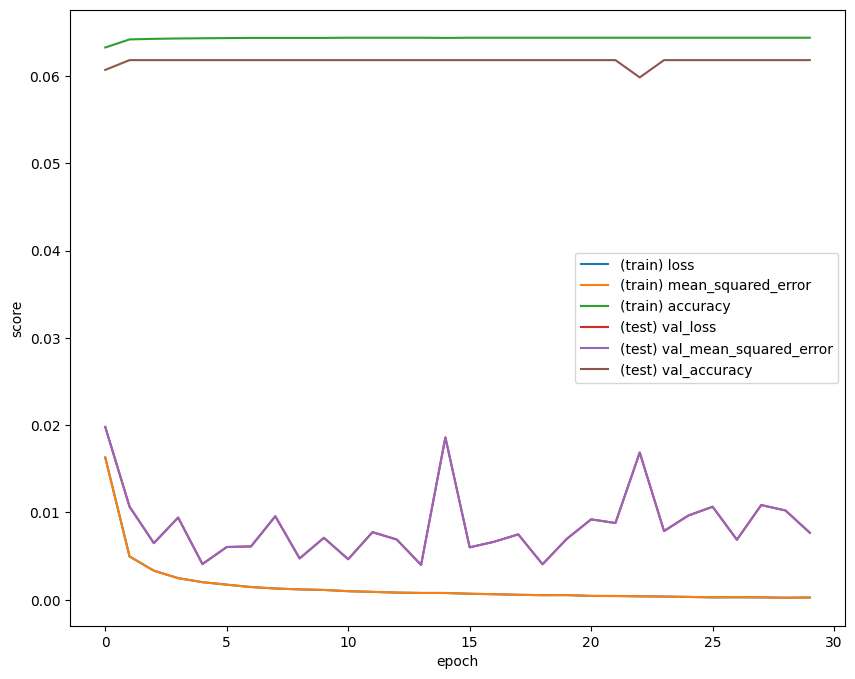

In [15]:
datafolder = '/content/drive/MyDrive/IntentoC/CNN'
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
for key in result.history :
  #if key == "loss" or key == "val_loss": continue
  label = ("(test) " if key.startswith("val_") else "(train) ") + key
  plt.plot(result.history[key], label=label)
#ax.set(ylim=[-0.1, 1.1])no h
ax.set(xlabel="epoch", ylabel="score")
ax.legend()
plt.show()
fig.savefig(datafolder + "plot-train_test_loss_metrics_1_CNN_LSTM.png")

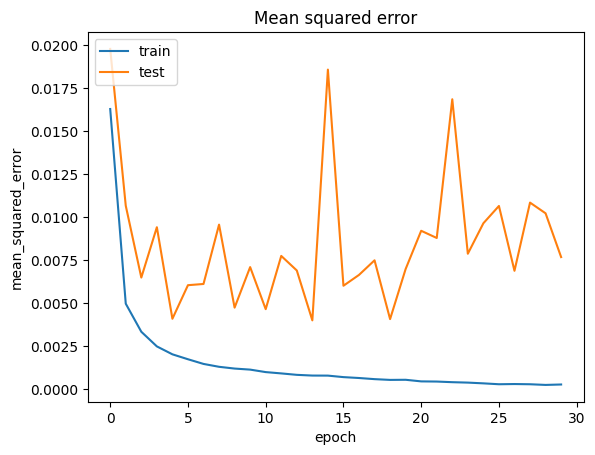

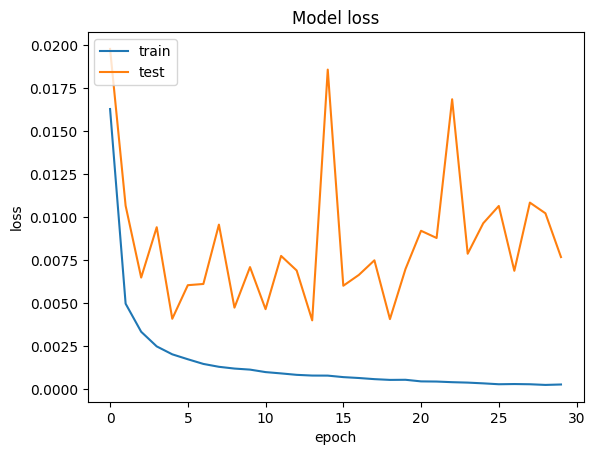

In [16]:
# summarize history for mean_squared_error
plt.plot(result.history['mean_squared_error'])
plt.plot(result.history['val_mean_squared_error'])
plt.title('Mean squared error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save and load network

In [17]:
### Save
dnn_filename = datafolder + "trained_CNN&LSTM_Average.h5"
model.save(dnn_filename)
print("Model saved to: " + dnn_filename)

### Load
model = tf.keras.models.load_model(datafolder + "trained_CNN&LSTM_Average.h5")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to: /content/drive/MyDrive/IntentoC/CNNtrained_CNN&LSTM_Average.h5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, None, 8, 64)       4864      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, None, 6, 64)       12352     
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, None, 6, 64)       256       
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, None, 6, 64)       0         
 stributed)                                                      
                                           

## Evaluate Model

**1 SUBJECT**

In [18]:
# Cargar el modelo entrenado
trained_model = tf.keras.models.load_model("/content/drive/MyDrive/IntentoC/CNNtrained_CNN&LSTM_Average.h5")

path = r'/content/drive/MyDrive/Data Base/Subjects/S7/ S7_106m_outdoor_velocity.CSV'

df= pd.read_csv(path, skiprows=1, usecols=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], names=['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Real_Displacement'])
print (df.info)
print(df.shape)

#Standarizing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler( feature_range = (0, 1) )
xtest = scaler.fit_transform(df)
xtest = pd.DataFrame(data = x, columns = ['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Real_Displacement'])

scaler = MinMaxScaler( feature_range = (0, 1) )
dftest = scaler.fit_transform(df)
dftest = pd.DataFrame(data = df, columns = ['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Real_Displacement'])

ytest = df['Real_Displacement']
ytest = pd.DataFrame(y)
print("y = \n",y)
print(ytest.shape)

print("x = \n",x)
print(xtest.shape)

#Verifying data shape
xtest.shape, ytest.shape

<bound method DataFrame.info of       Acc_x_knee  Acc_y_knee  Acc_z_knee  Gyro_x_knee  Gyro_y_knee  \
0           2.27       -9.23        2.78        -2.87         2.00   
1           2.57       -9.05        2.70        -1.56         1.50   
2           2.51       -9.24        2.67         0.31        -2.81   
3           2.82       -9.09        2.66         0.75        -4.56   
4           2.98       -9.11        2.70         0.69        -5.31   
...          ...         ...         ...          ...          ...   
8626        3.77       -8.69        2.17         1.56        -5.75   
8627        3.58       -8.79        2.34         0.88        -3.87   
8628        3.54       -8.85        2.38         0.56        -3.12   
8629        3.49       -8.77        2.29         1.31        -4.00   
8630        3.64       -8.81        2.22         1.56        -5.12   

      Gyro_z_knee  Magne_x_knee  Magne_y_knee  Magne_z_knee  Euler_x_knee  \
0          -13.13        -43.19         31.00     

<ipython-input-18-a9f5bdd37c87>:6: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  df= pd.read_csv(path, skiprows=1, usecols=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], names=['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Real_Displacement'])
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_

((58177, 25), (58177, 1))

In [19]:
print(dftest.head())
print(dftest.shape)
#df.loc[3,"y2"]
#df.loc[2:4]
#print(df.loc[2:4])

dataset_size = dftest.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously
n_steps = 10

xxtest = np.array([ xtest.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(xx[0:5]).loc
print("shape(xx) = ", xxtest.shape)

yytest = np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print("shape(yy) = ", yytest.shape)

# Preprocess the new dataset

xxtest = xxtest.reshape((xxtest.shape[0], n_steps, n_length, n_features))

print(xxtest.shape)
print(yytest.shape)


# Evaluate the model on the new dataset
mse  = model.evaluate(xxtest, yytest, verbose=0)
print("Mean squared error on new dataset:", mse)

# Realizar predicciones en el nuevo archivo
new_data_predictions = trained_model.predict(xxtest)
print(new_data_predictions[0:1])

# Crear un DataFrame con las predicciones
#predictions_df = pd.DataFrame(new_data_predictions, columns=['Predicted_Step_length'])

# Añadir las predicciones al DataFrame original del nuevo archivo
#new_data_with_predictions = pd.concat([xxtest, predictions_df], axis=1)


from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics

#Compute the mean squared error and mean absolute error
mse = mean_squared_error(yytest, new_data_predictions)
mae = mean_absolute_error(yytest, new_data_predictions)

# Print the results
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

mean_prediction = np.mean(new_data_predictions)
max = np.max(new_data_predictions)
min = np.min(new_data_predictions)
print("Max", max)
print("Min", min)

print("Mean of Predictions:", mean_prediction*1000)

# Cálculo de métricas de regresión
rmse = np.sqrt(mse)
r2 = metrics.r2_score(yytest, new_data_predictions)

print("Root Mean Squared Error: {}".format(rmse))
print("R-squared: {}".format(r2))


   Acc_x_knee  Acc_y_knee  Acc_z_knee  Gyro_x_knee  Gyro_y_knee  Gyro_z_knee  \
0        2.27       -9.23        2.78        -2.87         2.00       -13.13   
1        2.57       -9.05        2.70        -1.56         1.50       -13.75   
2        2.51       -9.24        2.67         0.31        -2.81       -14.06   
3        2.82       -9.09        2.66         0.75        -4.56       -13.69   
4        2.98       -9.11        2.70         0.69        -5.31       -12.88   

   Magne_x_knee  Magne_y_knee  Magne_z_knee  Euler_x_knee  ...  Gyro_x_hip  \
0        -43.19         31.00        -14.38        112.00  ...       40.19   
1        -43.19         31.00        -14.38        112.31  ...        4.00   
2        -43.19         31.00        -14.38        112.56  ...        1.19   
3        -42.75         31.37        -14.75        112.62  ...        2.44   
4        -42.75         31.37        -14.75        112.81  ...        3.50   

   Gyro_y_hip  Gyro_z_hip  Magne_x_hip  Magne_y_hi